In [5]:
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
  

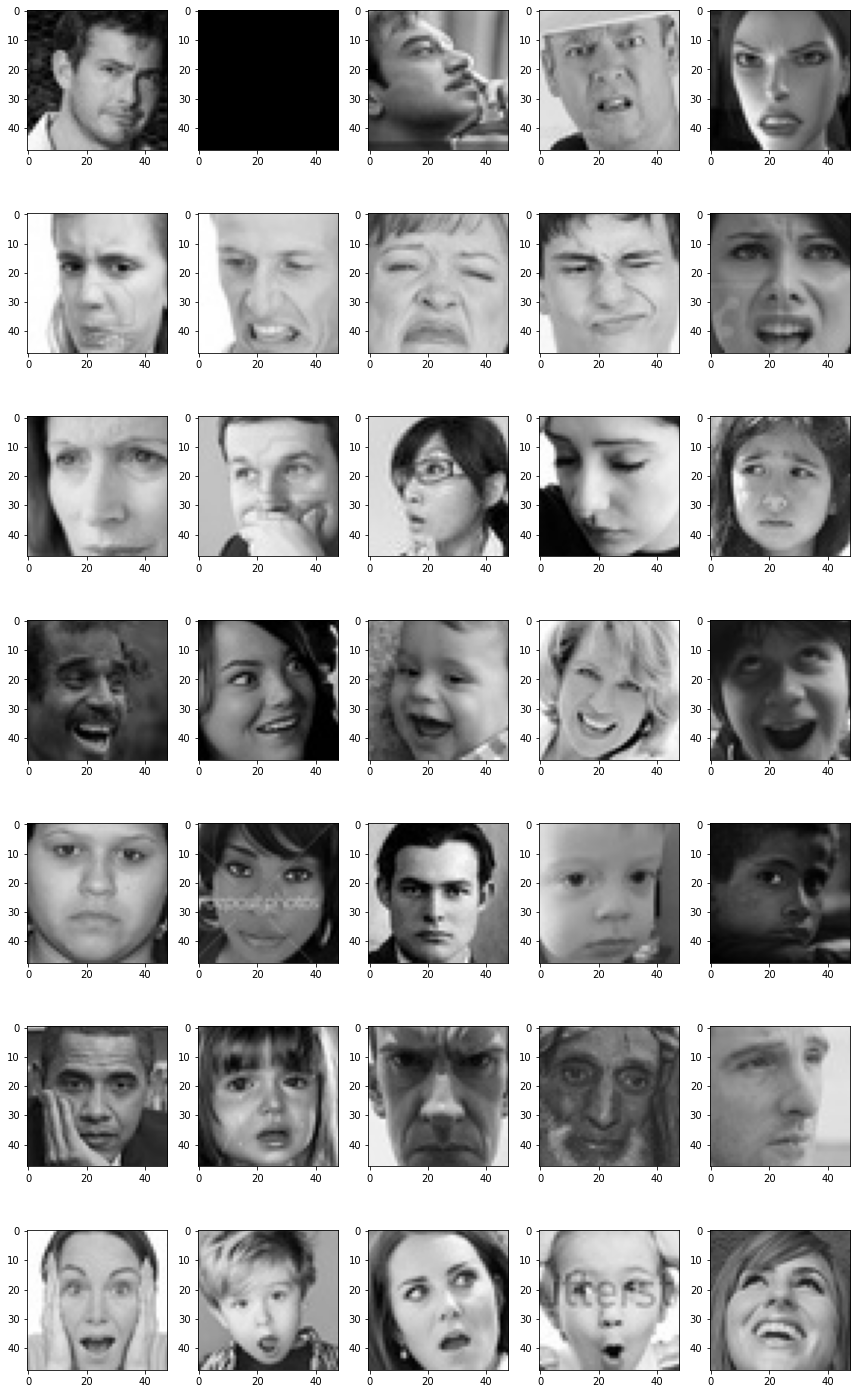

In [6]:
pic_size = 48

base_path = "../Facial_Expression_Recognition/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [7]:
for expression in os.listdir(base_path + 'train'):
    print(str(len(os.listdir(base_path+ 'train/' + expression)))+' '+ expression+' images')

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
batch_size = 128
 
datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path+ 'train',
                                                    target_size=(pic_size, pic_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

test_generator  = datagen_train.flow_from_directory(base_path+ 'test',
                                                    target_size=(pic_size, pic_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [20]:
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [21]:
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# number of epochs to train the NN
epochs = 50

from tensorflow.keras.callbacks import ModelCheckpoint
#filepath = ('')

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]



In [24]:
history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = test_generator,
                                validation_steps = test_generator.n//test_generator.batch_size,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
224/224 [==============================] - 608s 3s/step - loss: 2.0477 - accuracy: 0.2298 - val_loss: 1.7448 - val_accuracy: 0.3096
Epoch 2/50
224/224 [==============================] - 660s 3s/step - loss: 1.8305 - accuracy: 0.2950 - val_loss: 1.6848 - val_accuracy: 0.3411
Epoch 3/50
224/224 [==============================] - 576s 3s/step - loss: 1.7238 - accuracy: 0.3408 - val_loss: 1.6689 - val_accuracy: 0.3617
Epoch 4/50
224/224 [==============================] - 576s 3s/step - loss: 1.6547 - accuracy: 0.3641 - val_loss: 1.6417 - val_accuracy: 0.3726
Epoch 5/50
224/224 [==============================] - 576s 3s/step - loss: 1.5874 - accuracy: 0.3921 - val_loss: 1.5239 - val_accuracy: 0.4134
Epoch 6/50
224/224 [==============================] - 572s 3s/step - loss: 1.5344 - accuracy: 0.4130 - val_loss: 1.4995 - val_accuracy: 0.4185
Epoch 7/50
224/224 [==============================] - 542s 2s/step

Epoch 27/50
224/224 [==============================] - 498s 2s/step - loss: 0.9978 - accuracy: 0.6255 - val_loss: 1.0912 - val_accuracy: 0.5986
Epoch 28/50
224/224 [==============================] - 532s 2s/step - loss: 0.9823 - accuracy: 0.6270 - val_loss: 1.1433 - val_accuracy: 0.5889
Epoch 29/50
224/224 [==============================] - 534s 2s/step - loss: 0.9727 - accuracy: 0.6277 - val_loss: 1.0653 - val_accuracy: 0.6066
Epoch 30/50
224/224 [==============================] - 536s 2s/step - loss: 0.9544 - accuracy: 0.6437 - val_loss: 1.0756 - val_accuracy: 0.6080
Epoch 31/50
224/224 [==============================] - 536s 2s/step - loss: 0.9404 - accuracy: 0.6437 - val_loss: 1.0761 - val_accuracy: 0.6073
Epoch 32/50
224/224 [==============================] - 530s 2s/step - loss: 0.9178 - accuracy: 0.6556 - val_loss: 1.0514 - val_accuracy: 0.6091
Epoch 33/50
224/224 [==============================] - 539s 2s/step - loss: 0.9089 - accuracy: 0.6575 - val_loss: 1.0941 - val_accuracy:

In [38]:
model.save('model_weights.h5')

In [25]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

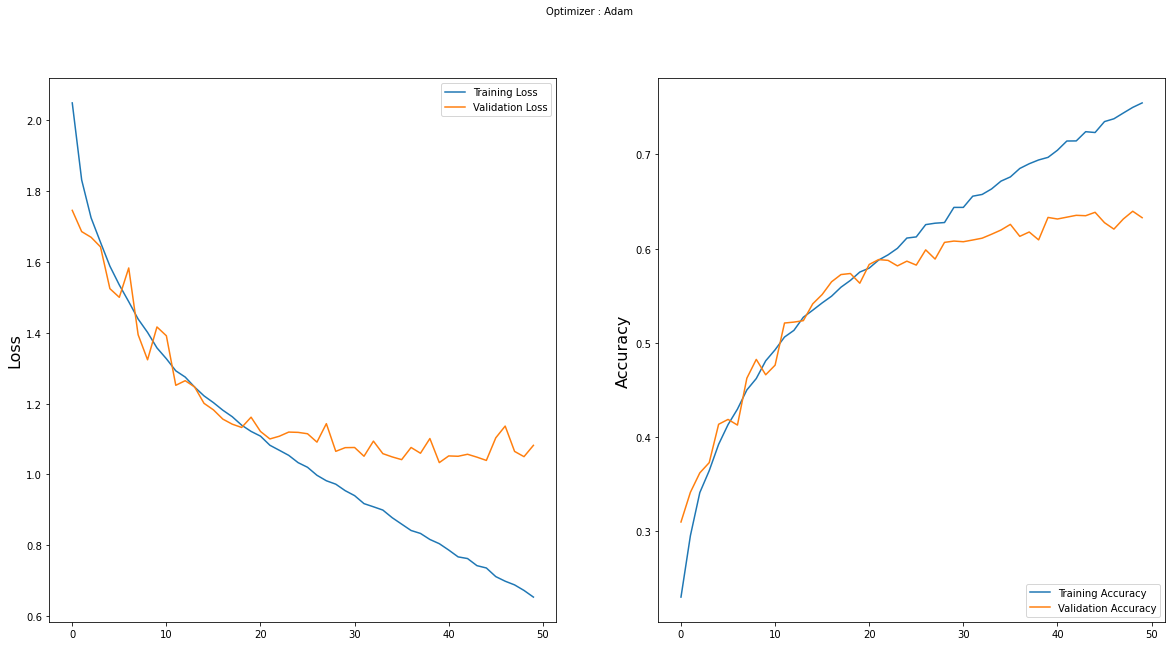

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

<Figure size 432x288 with 0 Axes>

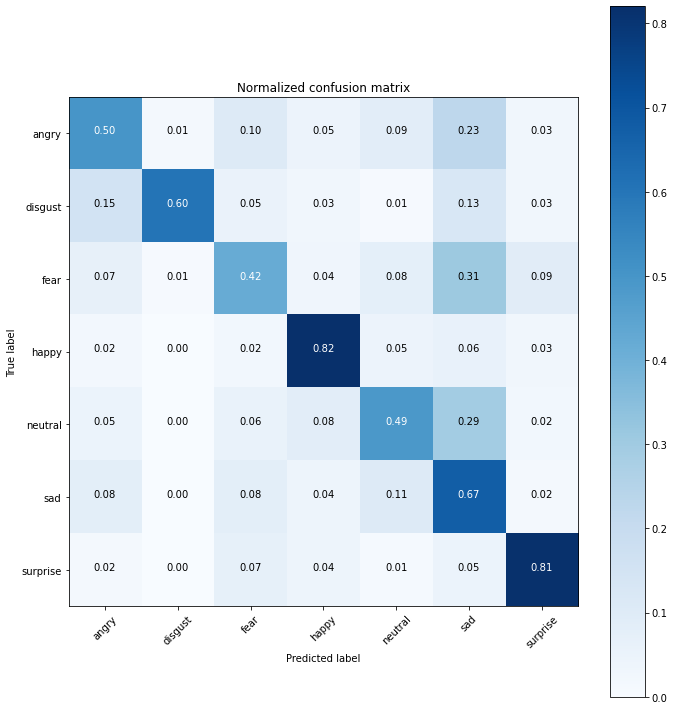

In [31]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict(test_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes
class_names = test_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()